# Objectives

1. Working on Dash Callbacks.
2. Extracting average monthly arrival delay time and see how it changes over the year.


## Dataset Used

[Airline Reporting Carrier On-Time Performance](https://developer.ibm.com/exchanges/data/all/airline/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01) dataset from [Data Asset eXchange](https://developer.ibm.com/exchanges/data/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01)


## Dash Application Creation

### To-do:

1.  Import required libraries, read the airline data, and create an application layout
2.  Add title to the dashboard using HTML H1 component
3.  Add a HTML division and core text input component inside the division. Provide an input component id and a default value to the component.
4.  Add a HTML dividion and core graph component. Provide a graph component id.
5.  Add callback decorator and provide input and output parameters.
6.  Define callback function, perform computation to extract required information, create the graph, and update the layout.
7.  Run the app

## Help and references

General examples can be found [here](https://dash.plotly.com/layout?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01).

*   For step 1 (only review), this is very specific to running app from Jupyerlab.

    *   For Jupyterlab,we will be using `jupyter-dash` library. Adding `from jupyter_dash import JupyterDash` import statement.
    *   Instead of creating dash application using `app = dash.Dash()`, we will be using `app = JupyterDash(__name__)`.
    *   Use pandas to read the airline data.
*   For step 2,

    *   [Plotly H1 HTML Component](https://dash.plotly.com/dash-html-components/h1?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01)

    *   Title as `Airline Performance Dashboard`

    *   Use `style` parameter and make the title center aligned, with color code `#503D36`, and font-size as 40. Check `More about HTML` section [here](https://dash.plotly.com/layout?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01).
*   For step 3,

    *   Add [dcc input](https://dash.plotly.com/dash-core-components/input?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01) component and provide id as `input-year`. Use `style` parameter and assign height of the inout box to be `50px` and font-size to be `35`.

    *   HTML [Div](https://dash.plotly.com/dash-html-components/div?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01) component and provide id as `line-plot`. Use `style` parameter and assign font-size as `40`.
*   For step 4,

    *   Core [graph](https://dash.plotly.com/dash-core-components/graph?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01) component and assign id as `line-plot`.
*   For 5 and 6,

    *   Basic [callback](https://dash.plotly.com/basic-callbacks?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01)


## App

In [1]:
# Import required libraries
import pandas as pd
import plotly.graph_objects as go
import dash
import dash_html_components as html
import dash_core_components as dcc
from dash.dependencies import Input, Output
from jupyter_dash import JupyterDash

# Create a dash application
app = JupyterDash(__name__)

# Read the airline data into pandas dataframe
airline_data =  pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/airline_data.csv', 
                            encoding = "ISO-8859-1",
                            dtype={'Div1Airport': str, 'Div1TailNum': str, 
                                   'Div2Airport': str, 'Div2TailNum': str})

# Get the layout of the application and adjust it.
# Create an outer division using html.Div and add title to the dashboard using html.H1 component
# Add a html.Div and core input text component
# Finally, add graph component.
app.layout = html.Div(children=[ html.H1('Airline Performance Dashboard', 
                                style={'textAlign': 'center', 'color': '#503D36',
                                'font-size': 40}),
                                html.Div(["Input Year: ", dcc.Input(id='input-year', value='2010', 
                                type='number', style={'height':'50px', 'font-size': 35}),], 
                                style={'font-size': 40}),
                                html.Br(),
                                html.Br(),
                                html.Div(dcc.Graph(id='line-plot')),
                                ])

# add callback decorator
@app.callback( Output(component_id='line-plot', component_property='figure'),
               Input(component_id='input-year', component_property='value'))

# Add computation to callback function and return graph
def get_graph(entered_year):
    # Select 2019 data
    df =  airline_data[airline_data['Year']==int(entered_year)]
    
    # Group the data by Month and compute average over arrival delay time.
    line_data = df.groupby('Month')['ArrDelay'].mean().reset_index()

    fig = go.Figure(data=go.Scatter(x=line_data['Month'], y=line_data['ArrDelay'], mode='lines', marker=dict(color='green')))
    fig.update_layout(title='Month vs Average Flight Delay Time', xaxis_title='Month', yaxis_title='ArrDelay')
    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(mode="inline", host="localhost", port=8005)

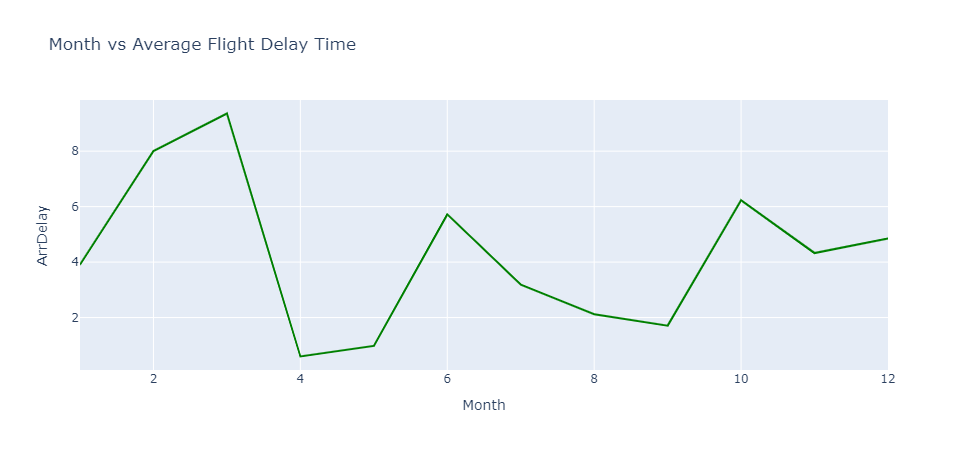

_**Note**: Since this is a very simple application, it was only run locally and not uploaded to a server, so it is not available to be seen in GitHub, but a png image of the dashboard was uploaded above._

__This is the end of the notebook.__ In this notebook some of the knowledge required for a data scientist and some of the skills used by data scientists on a daily basis were shown and applied. The learning material was provided by IBM, and the development of the code and notebook, as well as some notes and editions were carried out by me, [Saulo Villaseñor](https://www.linkedin.com/in/saulo-villase%C3%B1or-60669610a), so that this notebook is available as a reference for anyone who wishes to learn new skills.